<a href="https://colab.research.google.com/github/RodrigoTomeES/PersonalBlog/blob/master/ComparativaAlgoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparativa de los distintos algoritmos

Empieza ejecutando el siguiente comando para que no se muestren los warnings. 

In [0]:
import warnings; warnings.simplefilter('ignore')

## Carga de datos

Descarga el fichero de pima-indians-diabetes como realizamos en prácticas anteriores. 

In [165]:
!wget https://poseidus.midomotica.com/IA/dataset/train.csv

--2019-04-14 21:23:33--  https://poseidus.midomotica.com/IA/dataset/train.csv
Resolving poseidus.midomotica.com (poseidus.midomotica.com)... 104.24.104.184, 104.24.105.184
Connecting to poseidus.midomotica.com (poseidus.midomotica.com)|104.24.104.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19171 (19K) [application/octet-stream]
Saving to: ‘train.csv.7’

train.csv.7         100%[===================>]  18.72K  --.-KB/s    in 0s      

2019-04-14 21:23:33 (42.1 MB/s) - ‘train.csv.7’ saved [19171/19171]



Cargamos los datos del fichero train.csv utilizando la librería pandas.

In [0]:
import pandas as pd
df = pd.read_csv('train.csv')

Transformamos los datos categoricos a numéricos, Male a 0 y Female a 1. También hacemos lo mismo con la predicción de enfermedad, True = 1 y False = 0.

In [0]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Prediction'] = df['Prediction'].map({False: 0, True: 1})

In [0]:
df.drop(['Albumin'], axis=1, inplace=True) 

In [0]:
df.drop(['Direct_Bilirubin'], axis=1, inplace=True) 

In [0]:
df.drop(['Alamine_Aminotransferase'], axis=1, inplace=True) 

Almacenamos los vectores de descriptores en una variable X y las etiquetas en una variable Y.

In [0]:
X =  df.values[:,:-1]
Y =  df.values[:,-1]

## Partición de conjunto de entrenamiento y test

Es muy importante separar el conjunto de instancias en dos grupos: el conjunto de entrenamiento y el conjunto de test. Para ello, podemos utilizar la función train_test_split de la librería sklearn.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
(trainData, testData, trainLabels, testLabels) = train_test_split(X,Y,test_size=0.20, random_state=42)

In [0]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(trainData)
X_test_norm = mms.transform(testData)

In [0]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(trainData)
X_test_std = stdsc.transform(testData)

## Entrenando distintos algoritmos y seleccionando los hiperparámetros

Cargamos las librerias de los siguientes algoritmos:
 - KNN
 - Árboles de decisión
 - Regresión logística
 - SVM
 - Redes neuronales

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

### Validación manual (holdout)

La primera alternativa para seleccionar los hiperparámetros consiste en reservar una parte de las instancias del training set para validación, y probar distintos hiperparámetros de manera manual para ver cuál es la mejor solución con cada uno de ellos. Para ello utilizamos de nuevo la función `train_test_split`.

In [0]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
                                                                test_size=0.1, random_state=84)

In [0]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(trainData)
X_val_norm = mms.transform(valData)

In [0]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(trainData)
X_val_std = stdsc.transform(valData)

**KNN**

Empezamos ajustando los hiperparámetros del algoritmo KNN propbando con valores de k entre 1  y 25.

In [176]:
for k in range(1,26,2):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    modelKNN.fit(trainData, trainLabels)
    score = modelKNN.score(valData,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=1, precisión=74.29%
k=3, precisión=77.14%
k=5, precisión=77.14%
k=7, precisión=71.43%
k=9, precisión=65.71%
k=11, precisión=82.86%
k=13, precisión=74.29%
k=15, precisión=74.29%
k=17, precisión=74.29%
k=19, precisión=74.29%
k=21, precisión=74.29%
k=23, precisión=77.14%
k=25, precisión=77.14%


In [213]:
for k in range(1,26,2):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    modelKNN.fit(X_train_norm, trainLabels)
    score = modelKNN.score(X_val_norm,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=1, precisión=100.00%
k=3, precisión=80.00%
k=5, precisión=74.29%
k=7, precisión=71.43%
k=9, precisión=77.14%
k=11, precisión=74.29%
k=13, precisión=80.00%
k=15, precisión=77.14%
k=17, precisión=77.14%
k=19, precisión=77.14%
k=21, precisión=74.29%
k=23, precisión=80.00%
k=25, precisión=77.14%


In [216]:
for k in range(1,26,2):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    modelKNN.fit(X_train_std, trainLabels)
    score = modelKNN.score(X_val_std,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=1, precisión=100.00%
k=3, precisión=82.86%
k=5, precisión=77.14%
k=7, precisión=74.29%
k=9, precisión=82.86%
k=11, precisión=82.86%
k=13, precisión=82.86%
k=15, precisión=80.00%
k=17, precisión=80.00%
k=19, precisión=80.00%
k=21, precisión=80.00%
k=23, precisión=80.00%
k=25, precisión=80.00%


**Árboles de decisión**

Vamos ha hacer lo mismo visto para KNN para los árboles de decisión con el hiperparámetro min_samples_split con valores entre 2 y 10 avanzando de 1 en 1. Puedes ver lo que hace este hiperparámetro en la [documentación de sklearn](http://scikit-learn.org/stable/modules/tree.html).

In [177]:
for k in range(2,11):
    modelTree = DecisionTreeClassifier(min_samples_split=k, random_state=84)
    modelTree.fit(trainData, trainLabels)
    score = modelTree.score(valData,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=2, precisión=60.00%
k=3, precisión=60.00%
k=4, precisión=65.71%
k=5, precisión=71.43%
k=6, precisión=71.43%
k=7, precisión=74.29%
k=8, precisión=68.57%
k=9, precisión=62.86%
k=10, precisión=62.86%


In [217]:
for k in range(2,11):
    modelTree = DecisionTreeClassifier(min_samples_split=k, random_state=84)
    modelTree.fit(X_train_norm, trainLabels)
    score = modelTree.score(X_val_norm,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=2, precisión=100.00%
k=3, precisión=97.14%
k=4, precisión=94.29%
k=5, precisión=94.29%
k=6, precisión=97.14%
k=7, precisión=94.29%
k=8, precisión=91.43%
k=9, precisión=91.43%
k=10, precisión=91.43%


In [219]:
for k in range(2,11):
    modelTree = DecisionTreeClassifier(min_samples_split=k, random_state=84)
    modelTree.fit(X_train_std, trainLabels)
    score = modelTree.score(X_val_std,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=2, precisión=100.00%
k=3, precisión=97.14%
k=4, precisión=94.29%
k=5, precisión=94.29%
k=6, precisión=97.14%
k=7, precisión=94.29%
k=8, precisión=91.43%
k=9, precisión=91.43%
k=10, precisión=91.43%


**Regresión logística**

Repite lo mismo visto para KNN para la regresión logística con C tomando los valores 0.1,1,10,100, y 1000.

In [178]:
k = 0.1
while k <= 1000:
    modelLR = LogisticRegression(random_state=84, C=k)
    modelLR.fit(trainData, trainLabels)
    score = modelLR.score(valData,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))
    k *=10

k=0, precisión=71.43%
k=1, precisión=71.43%
k=10, precisión=71.43%
k=100, precisión=71.43%
k=1000, precisión=71.43%


In [221]:
k = 0.1
while k <= 1000:
    modelLR = LogisticRegression(random_state=84, C=k)
    modelLR.fit(X_train_norm, trainLabels)
    score = modelLR.score(X_val_norm,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))
    k *=10

k=0, precisión=71.43%
k=1, precisión=71.43%
k=10, precisión=71.43%
k=100, precisión=74.29%
k=1000, precisión=74.29%


In [222]:
k = 0.1
while k <= 1000:
    modelLR = LogisticRegression(random_state=84, C=k)
    modelLR.fit(X_train_std, trainLabels)
    score = modelLR.score(X_val_std,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))
    k *=10

k=0, precisión=71.43%
k=1, precisión=74.29%
k=10, precisión=74.29%
k=100, precisión=74.29%
k=1000, precisión=74.29%


### 10-fold cross validation 

Una alternativa al método anterior donde hacemos la separación del training set en training y validation de manera manual, consiste en utilizar el k-fold cross validation. Existen distintas alternativas para el k-fold cross validation en sklearn.

Recuperamos lo primero todo nuestro conjunto de entrenamiento uniendo el conjunto de entrenamiento y el de validación.

In [0]:
import numpy as np
trainData=np.concatenate((trainData,valData),axis=0)
trainLabels=np.concatenate((trainLabels,valLabels),axis=0)

**KNN**

La manera más sencilla de utilizar el k-fold validation consiste en utilizar la función `cross_val_score`.

In [180]:
from sklearn.model_selection import cross_val_score

for k in range(1,26,2):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelKNN,trainData,trainLabels,cv=10)
    print("k=%d, Precisión: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))

k=1, Precisión: 0.68 (+/- 0.19)
k=3, Precisión: 0.71 (+/- 0.15)
k=5, Precisión: 0.68 (+/- 0.13)
k=7, Precisión: 0.69 (+/- 0.12)
k=9, Precisión: 0.69 (+/- 0.14)
k=11, Precisión: 0.68 (+/- 0.17)
k=13, Precisión: 0.67 (+/- 0.13)
k=15, Precisión: 0.69 (+/- 0.15)
k=17, Precisión: 0.68 (+/- 0.15)
k=19, Precisión: 0.69 (+/- 0.15)
k=21, Precisión: 0.70 (+/- 0.14)
k=23, Precisión: 0.69 (+/- 0.12)
k=25, Precisión: 0.69 (+/- 0.11)


In [223]:
from sklearn.model_selection import cross_val_score

for k in range(1,26,2):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelKNN,X_train_norm,trainLabels,cv=10)
    print("k=%d, Precisión: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))

k=1, Precisión: 0.66 (+/- 0.16)
k=3, Precisión: 0.65 (+/- 0.11)
k=5, Precisión: 0.64 (+/- 0.10)
k=7, Precisión: 0.67 (+/- 0.11)
k=9, Precisión: 0.67 (+/- 0.14)
k=11, Precisión: 0.69 (+/- 0.17)
k=13, Precisión: 0.70 (+/- 0.12)
k=15, Precisión: 0.70 (+/- 0.14)
k=17, Precisión: 0.69 (+/- 0.08)
k=19, Precisión: 0.68 (+/- 0.09)
k=21, Precisión: 0.70 (+/- 0.07)
k=23, Precisión: 0.69 (+/- 0.08)
k=25, Precisión: 0.68 (+/- 0.08)


In [224]:
from sklearn.model_selection import cross_val_score

for k in range(1,26,2):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelKNN,X_train_std,trainLabels,cv=10)
    print("k=%d, Precisión: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))

k=1, Precisión: 0.68 (+/- 0.16)
k=3, Precisión: 0.66 (+/- 0.11)
k=5, Precisión: 0.65 (+/- 0.19)
k=7, Precisión: 0.69 (+/- 0.15)
k=9, Precisión: 0.68 (+/- 0.18)
k=11, Precisión: 0.69 (+/- 0.15)
k=13, Precisión: 0.69 (+/- 0.13)
k=15, Precisión: 0.71 (+/- 0.10)
k=17, Precisión: 0.71 (+/- 0.10)
k=19, Precisión: 0.71 (+/- 0.11)
k=21, Precisión: 0.71 (+/- 0.09)
k=23, Precisión: 0.70 (+/- 0.07)
k=25, Precisión: 0.71 (+/- 0.04)


In [0]:
modelSVM = SVC()

In [0]:
modelNeuronalNetwork = MLPClassifier()

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

def randomsearch(model,parameters):
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(model, parameters,cv=5)
    clf.fit(trainData, trainLabels)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

def randomsearchNORM(model,parameters):
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(model, parameters,cv=5)
    clf.fit(X_train_norm, trainLabels)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

def randomsearchSTD(model,parameters):
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(model, parameters,cv=5)
    clf.fit(X_train_std, trainLabels)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()

In [205]:
%time
randomsearch(modelNeuronalNetwork, {'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)], 
                        'activation': ['identity','logistic','tanh','relu'],
                        'momentum': [0.9, 0.95, 0.99],
                        'learning_rate_init': [0.001, 0.01, 0.1]})

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
# Tuning hyper-parameters for 0.7142857142857143

Best parameters set found on development set:

{'momentum': 0.9, 'learning_rate_init': 0.1, 'hidden_layer_sizes': (5, 3, 2), 'activation': 'identity'}



In [227]:
%time
randomsearchNORM(modelNeuronalNetwork, {'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)], 
                        'activation': ['identity','logistic','tanh','relu'],
                        'momentum': [0.9, 0.95, 0.99],
                        'learning_rate_init': [0.001, 0.01, 0.1]})

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.39 µs
# Tuning hyper-parameters for 0.7428571428571429

Best parameters set found on development set:

{'momentum': 0.9, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (3, 3, 3), 'activation': 'logistic'}



In [228]:
%time
randomsearchSTD(modelNeuronalNetwork, {'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)], 
                        'activation': ['identity','logistic','tanh','relu'],
                        'momentum': [0.9, 0.95, 0.99],
                        'learning_rate_init': [0.001, 0.01, 0.1]})

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs
# Tuning hyper-parameters for 0.7428571428571429

Best parameters set found on development set:

{'momentum': 0.9, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (5, 4, 3, 2), 'activation': 'relu'}



In [185]:
modelKNN = KNeighborsClassifier(n_neighbors=23)
modelKNN.fit(trainData, trainLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=23, p=2,
           weights='uniform')

In [249]:
modelKNNNorm = KNeighborsClassifier(n_neighbors=1)
modelKNNNorm.fit(X_train_norm, trainLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [250]:
modelKNNSTD = KNeighborsClassifier(n_neighbors=1)
modelKNNSTD.fit(X_train_std, trainLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [235]:
modelArbol = DecisionTreeClassifier(min_samples_split=10)
modelArbol.fit(trainData, trainLabels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [237]:
modelArbolNorm = DecisionTreeClassifier(min_samples_split=2)
modelArbolNorm.fit(X_train_norm, trainLabels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [238]:
modelArbolSTD = DecisionTreeClassifier(min_samples_split=2)
modelArbolSTD.fit(X_train_std, trainLabels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [187]:
modelLR = LogisticRegression(C=1000)
modelLR.fit(trainData, trainLabels)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [239]:
modelLRNorm = LogisticRegression(C=1)
modelLRNorm.fit(X_train_norm, trainLabels)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [240]:
modelLRSTD = LogisticRegression(C=1)
modelLRSTD.fit(, trainLabels)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [188]:
modelSVC = SVC()
modelSVC.fit(trainData, trainLabels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [206]:
modelRN = MLPClassifier(momentum= 0.9, 
                        learning_rate_init= 0.1, 
                        hidden_layer_sizes=(5, 3, 2), 
                        activation= 'identity')
modelRN.fit(trainData, trainLabels)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 3, 2), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [241]:
modelRNNorm = MLPClassifier(momentum= 0.9, 
                        learning_rate_init= 0.001, 
                        hidden_layer_sizes=(3, 3, 3), 
                        activation= 'logistic')
modelRNNorm.fit(X_train_norm, trainLabels)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [242]:
modelRNSTD = MLPClassifier(momentum= 0.9, 
                        learning_rate_init= 0.001, 
                        hidden_layer_sizes=(5, 4, 3, 2), 
                        activation= 'relu')
modelRNSTD.fit(X_train_std, trainLabels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 4, 3, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [190]:
from sklearn.metrics import classification_report

print("EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN")
predictionsKNN = modelKNN.predict(testData)
print(classification_report(testLabels, predictionsKNN))

EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN
              precision    recall  f1-score   support

         0.0       0.70      0.84      0.76        62
         1.0       0.29      0.15      0.20        26

   micro avg       0.64      0.64      0.64        88
   macro avg       0.49      0.50      0.48        88
weighted avg       0.58      0.64      0.60        88



In [251]:
from sklearn.metrics import classification_report

print("EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN")
predictionsKNN = modelKNNNorm.predict(X_test_norm)
print(classification_report(testLabels, predictionsKNN))

EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN
              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75        62
         1.0       0.45      0.58      0.51        26

   micro avg       0.67      0.67      0.67        88
   macro avg       0.63      0.64      0.63        88
weighted avg       0.70      0.67      0.68        88



In [252]:
from sklearn.metrics import classification_report

print("EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN")
predictionsKNN = modelKNNSTD.predict(X_test_std)
print(classification_report(testLabels, predictionsKNN))

EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78        62
         1.0       0.50      0.58      0.54        26

   micro avg       0.70      0.70      0.70        88
   macro avg       0.66      0.67      0.66        88
weighted avg       0.72      0.70      0.71        88



In [191]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO Árboles de decisión")
predictionsArbol = modelArbol.predict(testData)
print(classification_report(testLabels, predictionsArbol))

EVALUACIÓN EN CONJUNTO DE TEST USANDO Árboles de decisión
              precision    recall  f1-score   support

         0.0       0.72      0.66      0.69        62
         1.0       0.32      0.38      0.35        26

   micro avg       0.58      0.58      0.58        88
   macro avg       0.52      0.52      0.52        88
weighted avg       0.60      0.58      0.59        88



In [253]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO Árboles de decisión")
predictionsArbol = modelArbolNorm.predict(X_test_norm)
print(classification_report(testLabels, predictionsArbol))

EVALUACIÓN EN CONJUNTO DE TEST USANDO Árboles de decisión
              precision    recall  f1-score   support

         0.0       0.72      0.66      0.69        62
         1.0       0.32      0.38      0.35        26

   micro avg       0.58      0.58      0.58        88
   macro avg       0.52      0.52      0.52        88
weighted avg       0.60      0.58      0.59        88



In [254]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO Árboles de decisión")
predictionsArbol = modelArbolSTD.predict(X_test_std)
print(classification_report(testLabels, predictionsArbol))

EVALUACIÓN EN CONJUNTO DE TEST USANDO Árboles de decisión
              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71        62
         1.0       0.34      0.38      0.36        26

   micro avg       0.60      0.60      0.60        88
   macro avg       0.54      0.54      0.54        88
weighted avg       0.62      0.60      0.61        88



In [192]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO Regresión Logística")
predictionsRL = modelLR.predict(testData)
print(classification_report(testLabels, predictionsRL))

EVALUACIÓN EN CONJUNTO DE TEST USANDO Regresión Logística
              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81        62
         1.0       0.50      0.27      0.35        26

   micro avg       0.70      0.70      0.70        88
   macro avg       0.62      0.58      0.58        88
weighted avg       0.67      0.70      0.67        88



In [193]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO SVC")
predictionsSVC = modelSVC.predict(testData)
print(classification_report(testLabels, predictionsSVC))

EVALUACIÓN EN CONJUNTO DE TEST USANDO SVC
              precision    recall  f1-score   support

         0.0       0.70      1.00      0.83        62
         1.0       0.00      0.00      0.00        26

   micro avg       0.70      0.70      0.70        88
   macro avg       0.35      0.50      0.41        88
weighted avg       0.50      0.70      0.58        88



In [207]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO Redes Neuronales")
predictionsRN = modelRN.predict(testData)
print(classification_report(testLabels, predictionsRN))

EVALUACIÓN EN CONJUNTO DE TEST USANDO Redes Neuronales
              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83        62
         1.0       0.62      0.31      0.41        26

   micro avg       0.74      0.74      0.74        88
   macro avg       0.69      0.61      0.62        88
weighted avg       0.72      0.74      0.71        88



In [255]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO Redes Neuronales")
predictionsRN = modelRNNorm.predict(X_test_norm)
print(classification_report(testLabels, predictionsRN))

EVALUACIÓN EN CONJUNTO DE TEST USANDO Redes Neuronales
              precision    recall  f1-score   support

         0.0       0.70      1.00      0.83        62
         1.0       0.00      0.00      0.00        26

   micro avg       0.70      0.70      0.70        88
   macro avg       0.35      0.50      0.41        88
weighted avg       0.50      0.70      0.58        88



In [256]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO Redes Neuronales")
predictionsRN = modelRNSTD.predict(X_test_std)
print(classification_report(testLabels, predictionsRN))

EVALUACIÓN EN CONJUNTO DE TEST USANDO Redes Neuronales
              precision    recall  f1-score   support

         0.0       0.70      1.00      0.83        62
         1.0       0.00      0.00      0.00        26

   micro avg       0.70      0.70      0.70        88
   macro avg       0.35      0.50      0.41        88
weighted avg       0.50      0.70      0.58        88



In [195]:
!pip install StatisticalAnalysis

In [0]:
from StatisticalAnalysis import compare_methods

In [0]:
# Árbol de decisión
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Regresión logística
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}
# Red neuronal
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}

In [0]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP]

In [0]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP]

In [0]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP"]

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.594839 (0.048297)
SVM: 0.509876 (0.019596)
KNN: 0.569234 (0.064517)
LR: 0.511851 (0.045012)
MLP: 0.504228 (0.018905)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.911837, p:0.001210
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 5.101856, p:0.001778
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfilled, applying a non-parametric test
-----------------------

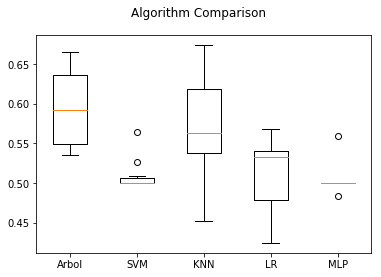

In [208]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.496191 (0.061304)
SVM: 0.500000 (0.000000)
KNN: 0.510789 (0.017612)
LR: 0.500000 (0.000000)
MLP: 0.500000 (0.000000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.683982, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 16.327591, p:0.000000
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfilled, applying a non-parametric test
----------------------

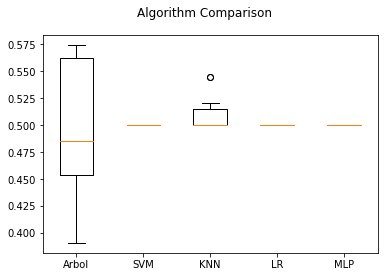

In [243]:
compare_methods(X_train_norm,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.496191 (0.061304)
SVM: 0.500000 (0.000000)
KNN: 0.521272 (0.028697)
LR: 0.496296 (0.011111)
MLP: 0.500000 (0.000000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.771143, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 14.890823, p:0.000000
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfilled, applying a non-parametric test
----------------------

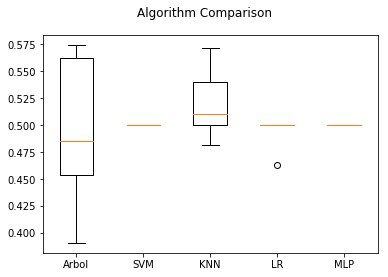

In [244]:
compare_methods(X_train_std,Y,listAlgorithms,listParams,listNames,metric='auroc')